In [39]:
PRFX_ESMB = 'MelInfEsmb0812B1'

In [40]:
from pathlib import Path
import pickle
import pandas as pd
import numpy as np
from sklearn.metrics import roc_auc_score as roc_auc
import matplotlib.pyplot as plt

class Param: pass

p_esmb = f'../output/{PRFX_ESMB}'; Path(p_esmb).mkdir(exist_ok=True,parents=True)
p_cmp = '../input/siim-isic-melanoma-classification'

# starting weights

In [41]:
# MelInfEsmb0809B1
prfx2wgt0 = {
    'MelInf0726B2tta16':1.0,
    'MelInf0805A1tta16':1.0,
    'MelInf0728A1tta16':1.0,
    'MelInf0728B1tta16':1.0,
    'MelInf0805C1tta16':1.0,
    'MelInf0727A1tta16':1.0,
    'MelInf0805D1tta16':1.0,
    'MelInf0727B1tta16':1.0,
    'MelInf0805E1tta16':1.0,
    'MelInf0726G2tta16':1.0,
    'MelInf0726G4tta16':1.0,
    'MelInf0726H2tta16':1.0,
    'MelInf0726H2tta16epc456':1.0,
    'MelInf0729H1tta16':1.0,
    'MelInf0729E1tta16':1.0,
    'MelInf0729D1tta16':1.0,
    'MelInf0806C1tta16':1.0,
    'MelInf0729F1tta16':1.0,
    'MelInf0806D1tta16':1.0,
    'MelInf0729C1tta16':1.0,
    'MelInf0729C1tta16epc456':1.0,
    'Mel0806E1tta16epc345':1.0,
    'MelInf0808A1tta16':1.0,
    'MelInf0729G3tta16epc567':1.0,
    'MelInf0801A1tta16':1.0,
    'MelInf0801B1tta16epc567':1.0,
    'MelInf0801C1tta16':1.0,
    'MelInf0801D2tta16':1.0,
}

In [42]:
prfx2oofs = {}
for prfx in prfx2wgt0.keys():
    p_out = f'../output/{prfx}'
    res = pickle.load(open(f'{p_out}/results_{prfx}.p', 'rb'))
    param = res['param']
    p_prp = f'../output/{param.PRFX_PREP}'
    dftrn = pd.read_csv(f'{p_prp}/train_all_dedup.csv') 

    vls=[]
    oofs=[]
    for fld in range(4):
        ep2oof = pickle.load(open(f'{p_out}/ep2oof_{prfx}_fld_{fld}.p', 'rb'))
        _,vl= res['fld2trvl'][fld]
        vls += list(vl)
        ep2oof = np.concatenate(ep2oof, 1)
        oof = ep2oof.mean(1)
        oofs += list(oof)

    ys = dftrn.target.iloc[vls]
    sortedzip = sorted(zip(vls, oofs, ys))
    _, oofs, ys = list(zip(*sortedzip))
    assert np.all(dftrn.target==ys)

    oofs = np.array(oofs)
    prfx2oofs[prfx] = oofs
    
    scr = roc_auc(ys, oofs)
    print(param.ARCH, param.SZ, f'{scr:.4f}', end=' ')
    
    idx20 = np.where(dftrn.source==20)[0]
    scr20 = roc_auc(dftrn.target.iloc[idx20], oofs[idx20])
    print(f'{scr20:.4f}', prfx2wgt0[prfx], prfx)

efficientnet-b0 224 0.9279 0.8960 1.0 MelInf0726B2tta16
efficientnet-b0 224 0.9236 0.8962 1.0 MelInf0805A1tta16
efficientnet-b1 224 0.9301 0.9082 1.0 MelInf0728A1tta16
efficientnet-b2 224 0.9298 0.9062 1.0 MelInf0728B1tta16
efficientnet-b2 224 0.9287 0.9053 1.0 MelInf0805C1tta16
efficientnet-b3 224 0.9294 0.9063 1.0 MelInf0727A1tta16
efficientnet-b3 224 0.9292 0.9064 1.0 MelInf0805D1tta16
efficientnet-b4 224 0.9318 0.9094 1.0 MelInf0727B1tta16
efficientnet-b4 224 0.9312 0.9103 1.0 MelInf0805E1tta16
efficientnet-b5 224 0.9288 0.9113 1.0 MelInf0726G2tta16
efficientnet-b5 224 0.9277 0.8979 1.0 MelInf0726G4tta16
efficientnet-b6 224 0.9317 0.9139 1.0 MelInf0726H2tta16
efficientnet-b6 224 0.9331 0.9120 1.0 MelInf0726H2tta16epc456
efficientnet-b0 384 0.9336 0.9063 1.0 MelInf0729H1tta16
efficientnet-b1 384 0.9340 0.9196 1.0 MelInf0729E1tta16
efficientnet-b2 384 0.9347 0.9205 1.0 MelInf0729D1tta16
efficientnet-b2 384 0.9375 0.9302 1.0 MelInf0806C1tta16
efficientnet-b3 384 0.9330 0.9169 1.0 MelI

In [43]:
oofs_esmb= np.zeros(len(dftrn))
for prfx,wgt in prfx2wgt0.items():
    p_out = f'../output/{prfx}'
    res = pickle.load(open(f'{p_out}/results_{prfx}.p', 'rb'))
    param = res['param']
    p_prp = f'../output/{param.PRFX_PREP}'
    dftrn = pd.read_csv(f'{p_prp}/train_all_dedup.csv') 

    oofs_esmb += wgt*prfx2oofs[prfx]
    scr = roc_auc(ys, oofs_esmb)
    scr20 = roc_auc(dftrn.target.iloc[idx20], oofs_esmb[idx20])
print(PRFX_ESMB, f'{scr:.4f}', f'{scr20:.4f}')

MelInfEsmb0812B1 0.9413 0.9251


# optimize

In [44]:
prfxes, wgts0 = list(zip(*prfx2wgt0.items()))

- https://www.kaggle.com/abhishek/optimizer-for-quadratic-weighted-kappa
- http://localhost:8080/notebooks/git/google-quest-challenge/working/QstPstp0208_4.ipynb

In [45]:
oofss = []
for prfx in prfxes:
    p_out = f'../output/{prfx}'
    res = pickle.load(open(f'{p_out}/results_{prfx}.p', 'rb'))
    param = res['param']
    p_prp = f'../output/{param.PRFX_PREP}'
    dftrn = pd.read_csv(f'{p_prp}/train_all_dedup.csv') 

    vls=[]
    oofs=[]
    for fld in range(4):
        ep2oof = pickle.load(open(f'{p_out}/ep2oof_{prfx}_fld_{fld}.p', 'rb'))
        _,vl= res['fld2trvl'][fld]
        vls += list(vl)
        ep2oof = np.concatenate(ep2oof, 1)
        oof = ep2oof.mean(1)
        oofs += list(oof)

    ys = dftrn.target.iloc[vls]
    sortedzip = sorted(zip(vls, oofs, ys))
    _, oofs, ys = list(zip(*sortedzip))
    assert np.all(dftrn.target==ys)
    print(vls[:15])
    oofss.append(oofs)
oofss = np.array(oofss)

[0, 1, 4, 6, 10, 15, 17, 19, 21, 29, 32, 33, 43, 47, 53]
[0, 1, 4, 6, 10, 15, 17, 19, 21, 29, 32, 33, 43, 47, 53]
[0, 1, 4, 6, 10, 15, 17, 19, 21, 29, 32, 33, 43, 47, 53]
[0, 1, 4, 6, 10, 15, 17, 19, 21, 29, 32, 33, 43, 47, 53]
[0, 1, 4, 6, 10, 15, 17, 19, 21, 29, 32, 33, 43, 47, 53]
[0, 1, 4, 6, 10, 15, 17, 19, 21, 29, 32, 33, 43, 47, 53]
[0, 1, 4, 6, 10, 15, 17, 19, 21, 29, 32, 33, 43, 47, 53]
[0, 1, 4, 6, 10, 15, 17, 19, 21, 29, 32, 33, 43, 47, 53]
[0, 1, 4, 6, 10, 15, 17, 19, 21, 29, 32, 33, 43, 47, 53]
[0, 1, 4, 6, 10, 15, 17, 19, 21, 29, 32, 33, 43, 47, 53]
[0, 1, 4, 6, 10, 15, 17, 19, 21, 29, 32, 33, 43, 47, 53]
[0, 1, 4, 6, 10, 15, 17, 19, 21, 29, 32, 33, 43, 47, 53]
[0, 1, 4, 6, 10, 15, 17, 19, 21, 29, 32, 33, 43, 47, 53]
[0, 1, 4, 6, 10, 15, 17, 19, 21, 29, 32, 33, 43, 47, 53]
[0, 1, 4, 6, 10, 15, 17, 19, 21, 29, 32, 33, 43, 47, 53]
[0, 1, 4, 6, 10, 15, 17, 19, 21, 29, 32, 33, 43, 47, 53]
[0, 1, 4, 6, 10, 15, 17, 19, 21, 29, 32, 33, 43, 47, 53]
[0, 1, 4, 6, 10, 15, 17, 19, 21

In [46]:
oofss.shape

(28, 58032)

In [47]:
bnds = ((0, None),)*len(prfxes)

In [48]:
import scipy as sp

class OptimizedRounder(object):
    def __init__(self):
        self.coef_ = 0
    
    def _minus_scr(self, coef):
        prd = np.average(oofss, axis=0, weights=coef)
        scr = roc_auc(ys, prd)
        return -scr
    
    def fit(self):
        initial_coef = wgts0
        self.coef_ = sp.optimize.minimize(self._minus_scr, initial_coef, bounds=bnds, method='Powell')
    
    def get_coef(self):
        return self.coef_['x']

In [49]:
%%time
optR = OptimizedRounder()
optR.fit()
coef = optR.get_coef()


CPU times: user 36 s, sys: 14.2 ms, total: 36 s
Wall time: 36 s


In [50]:
coef

array([7.46029804e-04, 3.09731799e-04, 2.74353733e-03, 5.79591457e-04,
       6.91591906e-04, 1.54682742e-03, 5.24235804e-04, 1.10410869e-02,
       4.62910063e-04, 5.41501032e-03, 1.05493822e-03, 3.87158803e+00,
       1.35207566e-02, 6.45732553e-04, 4.16078018e-03, 1.31293106e-03,
       3.45995600e+00, 2.13830503e-03, 4.47865373e-04, 1.65299719e+00,
       1.83416861e-04, 2.98051104e+00, 6.66430227e-04, 1.73849707e+00,
       2.48916149e+00, 2.55286614e+00, 2.61983856e-01, 1.90087404e-03])

In [51]:
prd=np.average(oofss, axis=0, weights=coef)
roc_auc(ys, prd)

0.9437165032683277

In [52]:
prfx2wgt = dict(zip(prfxes, coef))

In [53]:
prfx2oofs = {}
for prfx in prfx2wgt.keys():
    p_out = f'../output/{prfx}'
    res = pickle.load(open(f'{p_out}/results_{prfx}.p', 'rb'))
    param = res['param']
    p_prp = f'../output/{param.PRFX_PREP}'
    dftrn = pd.read_csv(f'{p_prp}/train_all_dedup.csv') 

    vls=[]
    oofs=[]
    for fld in range(4):
        ep2oof = pickle.load(open(f'{p_out}/ep2oof_{prfx}_fld_{fld}.p', 'rb'))
        _,vl= res['fld2trvl'][fld]
        vls += list(vl)
        ep2oof = np.concatenate(ep2oof, 1)
        oof = ep2oof.mean(1)
        oofs += list(oof)

    ys = dftrn.target.iloc[vls]
    sortedzip = sorted(zip(vls, oofs, ys))
    _, oofs, ys = list(zip(*sortedzip))
    assert np.all(dftrn.target==ys)

    oofs = np.array(oofs)
    prfx2oofs[prfx] = oofs
    
    scr = roc_auc(ys, oofs)
    print(param.ARCH, param.SZ, f'{scr:.4f}', end=' ')
    
    idx20 = np.where(dftrn.source==20)[0]
    scr20 = roc_auc(dftrn.target.iloc[idx20], oofs[idx20])
    print(f'{scr20:.4f}', prfx2wgt[prfx], prfx)

efficientnet-b0 224 0.9279 0.8960 0.0007460298037966455 MelInf0726B2tta16
efficientnet-b0 224 0.9236 0.8962 0.000309731799260448 MelInf0805A1tta16
efficientnet-b1 224 0.9301 0.9082 0.002743537327902644 MelInf0728A1tta16
efficientnet-b2 224 0.9298 0.9062 0.0005795914566455156 MelInf0728B1tta16
efficientnet-b2 224 0.9287 0.9053 0.0006915919058972631 MelInf0805C1tta16
efficientnet-b3 224 0.9294 0.9063 0.0015468274152887686 MelInf0727A1tta16
efficientnet-b3 224 0.9292 0.9064 0.000524235804034386 MelInf0805D1tta16
efficientnet-b4 224 0.9318 0.9094 0.011041086860109572 MelInf0727B1tta16
efficientnet-b4 224 0.9312 0.9103 0.00046291006347019305 MelInf0805E1tta16
efficientnet-b5 224 0.9288 0.9113 0.005415010317159519 MelInf0726G2tta16
efficientnet-b5 224 0.9277 0.8979 0.0010549382186918262 MelInf0726G4tta16
efficientnet-b6 224 0.9317 0.9139 3.871588031657682 MelInf0726H2tta16
efficientnet-b6 224 0.9331 0.9120 0.0135207565501438 MelInf0726H2tta16epc456
efficientnet-b0 384 0.9336 0.9063 0.0006457

In [54]:
oofs_esmb= np.zeros(len(dftrn))
for prfx,wgt in prfx2wgt.items():
    p_out = f'../output/{prfx}'
    res = pickle.load(open(f'{p_out}/results_{prfx}.p', 'rb'))
    param = res['param']
    p_prp = f'../output/{param.PRFX_PREP}'
    dftrn = pd.read_csv(f'{p_prp}/train_all_dedup.csv') 

    oofs_esmb += wgt*prfx2oofs[prfx]
    scr = roc_auc(ys, oofs_esmb)
    scr20 = roc_auc(dftrn.target.iloc[idx20], oofs_esmb[idx20])
print(PRFX_ESMB, f'{scr:.4f}', f'{scr20:.4f}')

MelInfEsmb0812B1 0.9437 0.9309


In [55]:
dfsub = pd.read_csv(f'{p_cmp}/sample_submission.csv') 


wgt_ttl=0
sub_esmb=np.zeros(len(dfsub))
for prfx,wgt in prfx2wgt.items():
    p_out = f'../output/{prfx}'
    res = pickle.load(open(f'{p_out}/results_{prfx}.p', 'rb'))
    param = res['param']
    dfsubi = pd.read_csv(f'{p_out}/submission_{prfx}_avglast{param.LASTM}.csv')
    wgt_ttl+=wgt
    subi = dfsubi.target
    print(prfx, subi.mean())
#     plt.hist(subi, bins=50);
#     plt.show()
    sub_esmb += wgt*subi
sub_esmb/=wgt_ttl

MelInf0726B2tta16 0.17577293900882407
MelInf0805A1tta16 0.1852360767356046
MelInf0728A1tta16 0.1697970152984186
MelInf0728B1tta16 0.15783098760570596
MelInf0805C1tta16 0.18550869943493037
MelInf0727A1tta16 0.15930823437581493
MelInf0805D1tta16 0.17837462669376472
MelInf0727B1tta16 0.15253438272176548
MelInf0805E1tta16 0.17570575343026482
MelInf0726G2tta16 0.15595904496625135
MelInf0726G4tta16 0.195412380182344
MelInf0726H2tta16 0.15230585584603645
MelInf0726H2tta16epc456 0.1767112095981086
MelInf0729H1tta16 0.15282431964950818
MelInf0729E1tta16 0.14824956054377292
MelInf0729D1tta16 0.1499509768921909
MelInf0806C1tta16 0.1632805076088609
MelInf0729F1tta16 0.1487084176636413
MelInf0806D1tta16 0.17213049339909336
MelInf0729C1tta16 0.1371323752740608
MelInf0729C1tta16epc456 0.1582704462621681
Mel0806E1tta16epc345 0.1657605117769836
MelInf0808A1tta16 0.1786412484494178
MelInf0729G3tta16epc567 0.18763088324121233
MelInf0801A1tta16 0.16702342384519106
MelInf0801B1tta16epc567 0.174037746691677

0.16349698330487325


,image_name,target
0,ISIC_0052060,0.070432
1,ISIC_0052349,0.056110
2,ISIC_0058510,0.074466


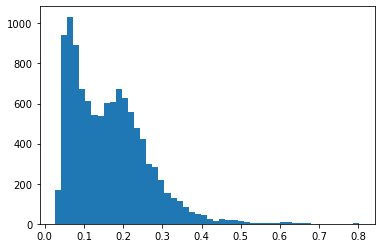

In [56]:
print(sub_esmb.mean())
dfsub.target = sub_esmb

display(dfsub.head(3))
plt.hist(dfsub.target, bins=50);

In [57]:
dfsub.to_csv(f'{p_esmb}/submission_{PRFX_ESMB}.csv', index=False)